In [1]:
pip install vega_datasets

     |████████████████████████████████| 210 kB 3.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from vega_datasets import data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [4]:
df = data.sf_temps()

In [5]:
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [6]:
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [7]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


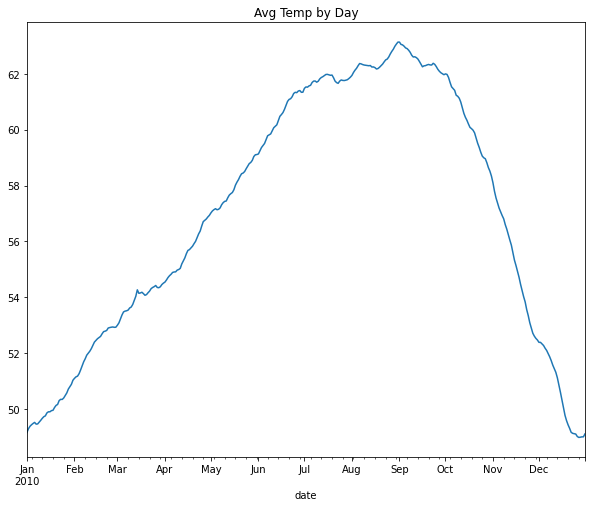

In [8]:
plt.figure(figsize=(10,8))

df.resample('D').temp.mean().plot()

plt.title('Avg Temp by Day')
plt.show()

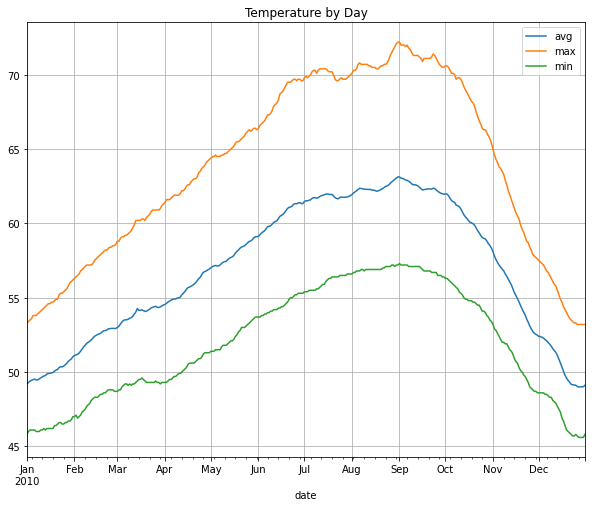

In [9]:
plt.figure(figsize=(10,8))

df.resample('D').temp.mean().plot(label = 'avg')
df.resample('D').temp.max().plot(label = 'max')
df.resample('D').temp.min().plot(label = 'min')

plt.grid(visible = True)
plt.legend()
plt.title('Temperature by Day')
plt.show()

In [10]:
#december seems to be the coldest month on average
#september seems to have the highest temp on average

In [11]:
df['month'] = df.index.month_name()
df.head()

,temp,month
date,,
2010-01-01 00:00:00,47.8,January
2010-01-01 01:00:00,47.4,January
2010-01-01 02:00:00,46.9,January
2010-01-01 03:00:00,46.5,January
2010-01-01 04:00:00,46.0,January


In [13]:
df.groupby('month').mean().sort_values('temp').head(1)

,temp
month,
January,49.98414


In [14]:
df.groupby('month').mean().idxmax()

temp    September
dtype: object

In [16]:
df_daily = df.resample('D').agg(['min','max']).temp
df_daily.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [17]:
df_daily['temp_diff'] = df_daily['max'] - df_daily['min']
df_daily.head()

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [18]:
df_daily['month']= df_daily.index.month_name()

In [20]:
df_daily.groupby('month').max().sort_values('temp_diff', ascending=False).head(1)

,min,max,temp_diff
month,,,
August,57.2,72.2,15.0


In [21]:
seattle = data.seattle_weather()
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [22]:
seattle = seattle.set_index('date')

In [23]:
seattle

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [25]:
seattle['year_month'] = seattle.index.strftime('%Y-%b')

In [28]:
seattle.groupby('year_month').max().precipitation.idxmax()

'2015-Mar'

In [34]:
s_month= seattle.resample('M').max()

In [35]:
s_month.precipitation.max()

55.9

In [36]:
s_month[s_month.precipitation == 55.9]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-03-31,55.9,20.6,10.6,5.7,sun


In [29]:
# March 2015 is the year and month combination that has the highest amount of precipitation

In [39]:
seattle.resample('M').precipitation.mean()

date
2012-01-31    5.590323
2012-02-29    3.182759
2012-03-31    5.903226
2012-04-30    2.270000
2012-05-31    1.683871
2012-06-30    2.503333
2012-07-31    0.848387
2012-08-31    0.000000
2012-09-30    0.030000
2012-10-31    5.493548
2012-11-30    7.016667
2012-12-31    5.612903
2013-01-31    3.409677
2013-02-28    1.439286
2013-03-31    2.248387
2013-04-30    4.986667
2013-05-31    1.951613
2013-06-30    1.103333
2013-07-31    0.000000
2013-08-31    1.109677
2013-09-30    5.226667
2013-10-31    1.264516
2013-11-30    3.210000
2013-12-31    1.367742
2014-01-31    3.032258
2014-02-28    5.542857
2014-03-31    7.741935
2014-04-30    3.536667
2014-05-31    2.580645
2014-06-30    0.626667
2014-07-31    0.632258
2014-08-31    1.483871
2014-09-30    1.890000
2014-10-31    5.532258
2014-11-30    4.103333
2014-12-31    3.929032
2015-01-31    3.000000
2015-02-28    4.792857
2015-03-31    3.661290
2015-04-30    1.720000
2015-05-31    0.477419
2015-06-30    0.196667
2015-07-31    0.074194
2015-0

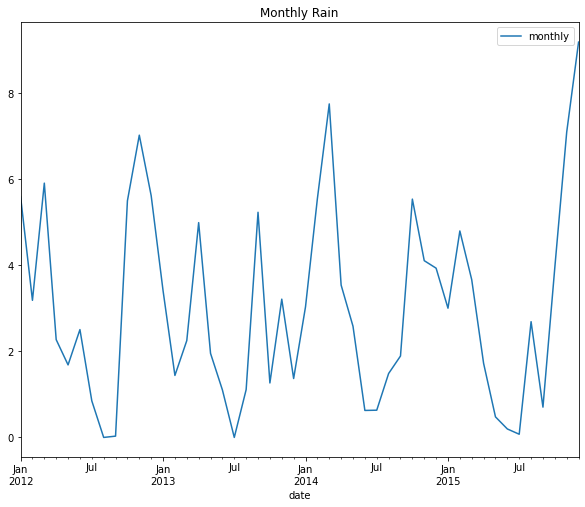

In [41]:
plt.figure(figsize=(10,8))

# seattle.resample('M').sum().precipitation.plot()
seattle.resample('M').precipitation.mean().plot(label='monthly')

plt.legend()
plt.title('Monthly Rain')
plt.show()

In [42]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [31]:
seattle.resample('M').sum().wind

date
2012-01-31    120.9
2012-02-29    113.2
2012-03-31    131.7
2012-04-30    101.2
2012-05-31    104.0
2012-06-30     92.5
2012-07-31     89.2
2012-08-31     87.7
2012-09-30     79.4
2012-10-31    109.5
2012-11-30     96.6
2012-12-31    118.8
2013-01-31     89.2
2013-02-28    101.7
2013-03-31    107.3
2013-04-30    111.4
2013-05-31     97.9
2013-06-30     90.1
2013-07-31     83.3
2013-08-31     78.8
2013-09-30     90.4
2013-10-31     70.5
2013-11-30     95.4
2013-12-31     84.8
2014-01-31    103.8
2014-02-28    126.8
2014-03-31    114.0
2014-04-30    110.9
2014-05-31     97.8
2014-06-30     95.7
2014-07-31     96.0
2014-08-31     76.8
2014-09-30     94.3
2014-10-31     90.4
2014-11-30    119.5
2014-12-31    110.5
2015-01-31     75.3
2015-02-28     86.2
2015-03-31     90.9
2015-04-30     99.4
2015-05-31     87.2
2015-06-30     97.4
2015-07-31     92.5
2015-08-31     97.8
2015-09-30     91.5
2015-10-31     94.1
2015-11-30    106.4
2015-12-31    134.6
Freq: M, Name: wind, dtype: float64

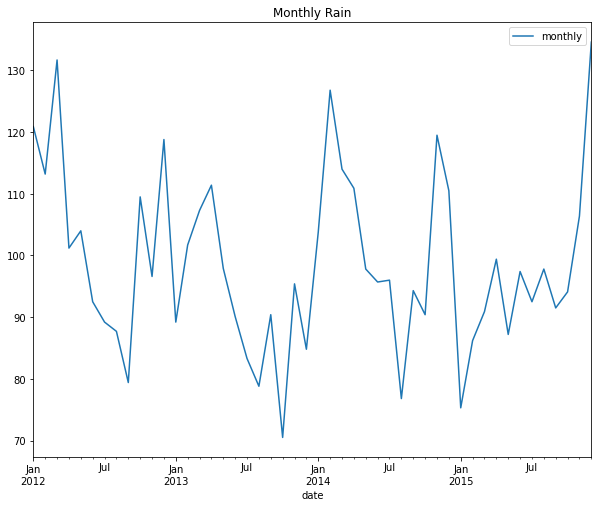

In [32]:
plt.figure(figsize=(10,8))

seattle.resample('M').wind.sum().plot(label='monthly')

plt.legend()
plt.title('Monthly Rain')
plt.show()

In [34]:
seattle.groupby('year_month').sum().wind.idxmax()

'2015-Dec'

In [35]:
# The windiest year-month comination is 2015-12

In [62]:
weather = seattle[seattle.weather == 'sun']

In [72]:
weather.resample('Y').count()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,118,118,118,118,118
2013-12-31,205,205,205,205,205
2014-12-31,211,211,211,211,211
2015-12-31,180,180,180,180,180


In [73]:
# The sunniest year was 2013

In [74]:
weather = seattle[seattle.weather == 'rain']

In [77]:
weather.resample('M').count()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-31,18,18,18,18,18
2012-02-29,17,17,17,17,17
2012-03-31,19,19,19,19,19
2012-04-30,19,19,19,19,19
2012-05-31,16,16,16,16,16
2012-06-30,19,19,19,19,19
2012-07-31,12,12,12,12,12
2012-08-31,2,2,2,2,2
2012-09-30,4,4,4,4,4


<Figure size 720x576 with 0 Axes>

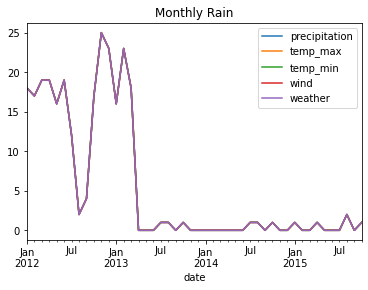

In [78]:
plt.figure(figsize=(10,8))

weather.resample('M').count().plot(label='monthly')

plt.legend()
plt.title('Monthly Rain')
plt.show()

In [79]:
# It rained most in November 2012 for 25 days

In [82]:
no_rain = seattle[seattle.precipitation == 0]

In [85]:
no_rain.resample('M').count() == 31

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-31,False,False,False,False,False
2012-02-29,False,False,False,False,False
2012-03-31,False,False,False,False,False
2012-04-30,False,False,False,False,False
2012-05-31,False,False,False,False,False
2012-06-30,False,False,False,False,False
2012-07-31,False,False,False,False,False
2012-08-31,True,True,True,True,True
2012-09-30,False,False,False,False,False


In [86]:
# August 2012 and July 2013 has 31 days without rain

In [36]:
data.flights_20k()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [37]:
flights = data.flights_20k()

In [38]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [39]:
flights = flights.set_index('date')

In [40]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND


In [41]:
flights.delay = np.where(flights.delay < 0, 0, flights.delay)

In [42]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [43]:
flights['hour'] = flights.index.hour
flights

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21
...,...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK,15
2001-01-19 13:05:00,0,1489,SEA,MCI,13
2001-02-07 11:37:00,0,1848,MCO,PHX,11


In [45]:
flights.groupby('hour').mean().delay.idxmax()

3

In [46]:
flights = flights[['delay']]

In [47]:
flights.head()

,delay
date,
2001-01-13 14:56:00,32
2001-01-31 16:40:00,0
2001-02-11 18:39:00,3
2001-01-10 21:00:00,0
2001-03-30 21:45:00,0


In [48]:
flights.resample('H').mean().max()

delay    360.0
dtype: float64

In [49]:
flights[flights.delay == 360]

,delay
date,
2001-02-23 03:25:00,360


In [50]:
flights['weekday'] = flights.index.day_name()

/var/folders/wx/_fv12n6x4cg3kc7g59l881s00000gn/T/ipykernel_40066/3892137131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['weekday'] = flights.index.day_name()


In [51]:
flights.groupby('weekday').sum()

,delay
weekday,
Friday,53770
Monday,21354
Saturday,19755
Sunday,27221
Thursday,38605
Tuesday,27715
Wednesday,33969


In [52]:
# The day of the week does make a difference in the delay amount.  There seems to be more delays on 
# Fridays than any other day o the week where as Saturdays have the least amount of delays

In [53]:
flights['month'] = flights.index.month_name()

/var/folders/wx/_fv12n6x4cg3kc7g59l881s00000gn/T/ipykernel_40066/637287040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['month'] = flights.index.month_name()


In [54]:
flights.groupby('month').sum()

,delay
month,
February,76987
January,76670
March,68732


In [147]:
# There's not a drastic difference in the amount of delays between the three recorded months but March is lower than the other two.

In [149]:
iowa = data.iowa_electricity()

In [150]:
iowa.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [151]:
iowa = iowa.set_index('year')

In [152]:
iowa.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2002-01-01,Fossil Fuels,35991
2003-01-01,Fossil Fuels,36234
2004-01-01,Fossil Fuels,36205
2005-01-01,Fossil Fuels,36883


In [153]:
iowa.shape

(51, 2)

Fossil Fuels      17
Nuclear Energy    17
Renewables        17
Name: source, dtype: int64

,net_generation
source,
Fossil Fuels,620129
Nuclear Energy,80103
Renewables,164220
